## Loading DataSet

In [5]:
import pandas as pd
import numpy as np

data = pd.read_csv('titanic.csv')

In [6]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


## Univariate Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

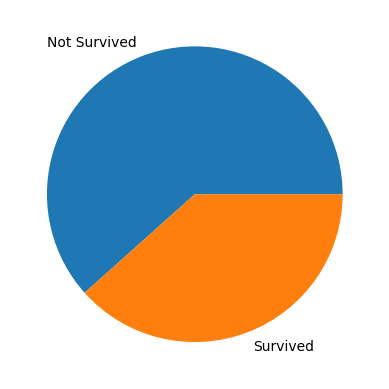

In [12]:
survive = data["survived"].value_counts()
plt.pie(survive, labels = ['Not Survived','Survived']) 
plt.show()

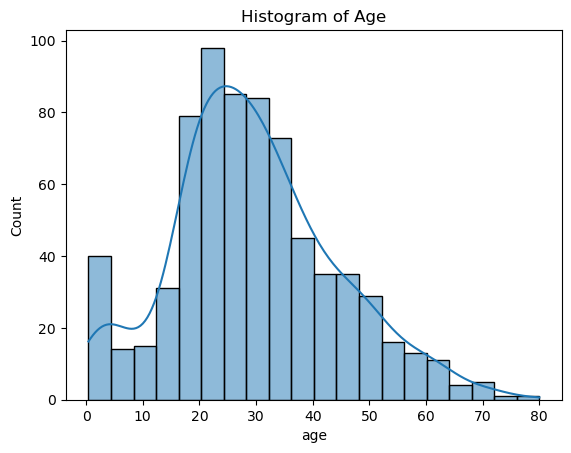

In [9]:
age = data["age"]
sns.histplot(age, kde=True)
plt.title("Histogram of Age")
plt.show()

<Axes: xlabel='sex', ylabel='count'>

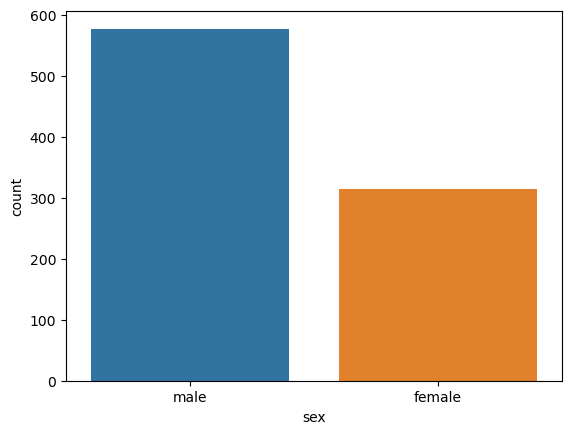

In [17]:
sns.countplot(x = data['sex'])

<Axes: xlabel='pclass', ylabel='count'>

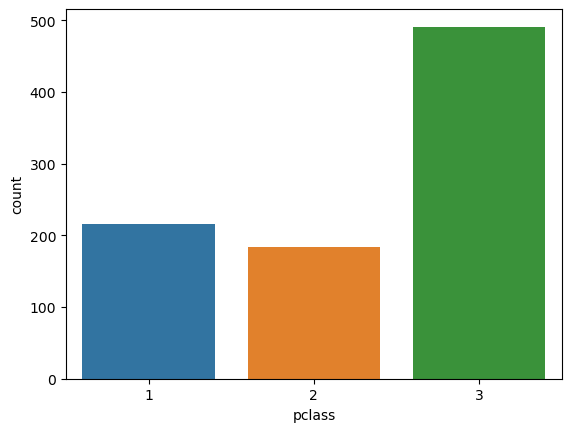

In [19]:
sns.countplot(x = data['pclass'])

<Axes: xlabel='sibsp', ylabel='count'>

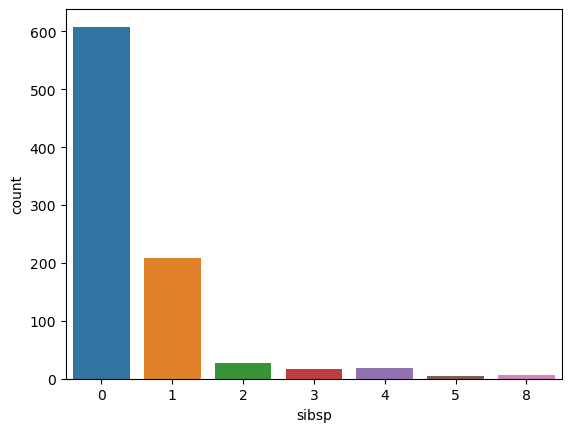

In [20]:
sns.countplot(x = data['sibsp'])

<Axes: xlabel='parch', ylabel='count'>

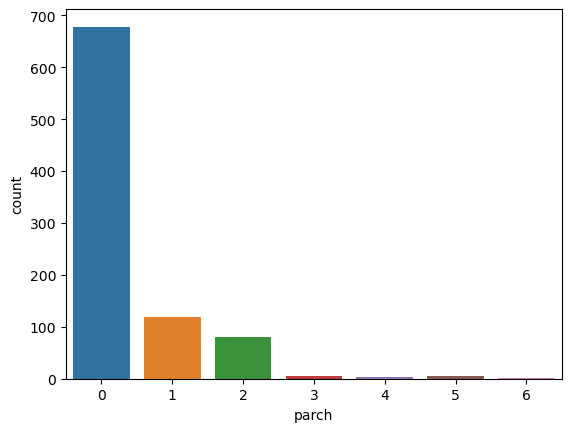

In [21]:
sns.countplot(x = data['parch'])

<Axes: xlabel='embarked', ylabel='count'>

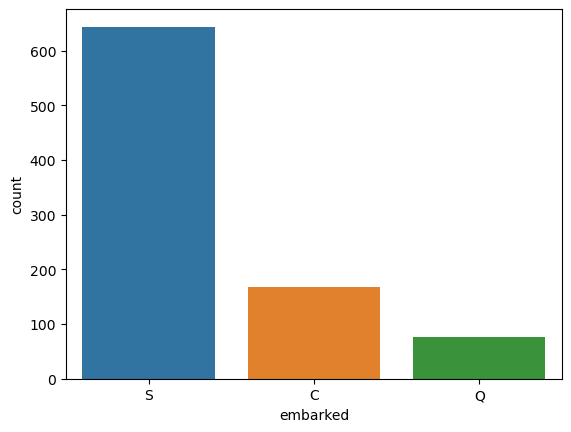

In [22]:
sns.countplot(x = data['embarked'])

## Bi-variate Analysis

<Axes: xlabel='pclass', ylabel='survived'>

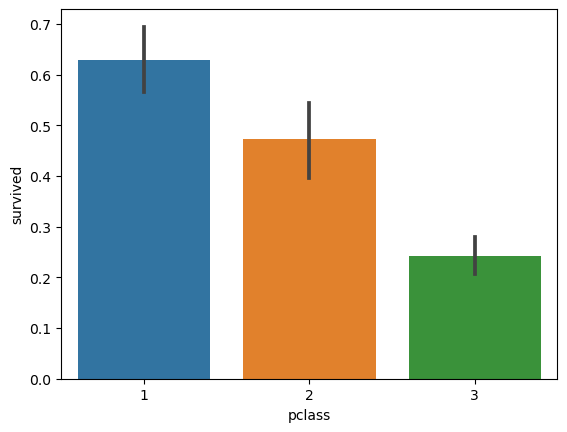

In [26]:
sns.barplot(data = data, x = 'pclass', y = 'survived')

<Axes: xlabel='embarked', ylabel='fare'>

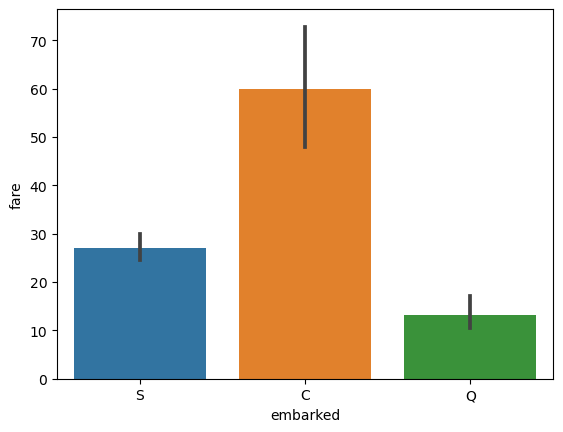

In [38]:
sns.barplot(data = data, x = 'embarked', y = 'fare')

<Axes: xlabel='alive', ylabel='count'>

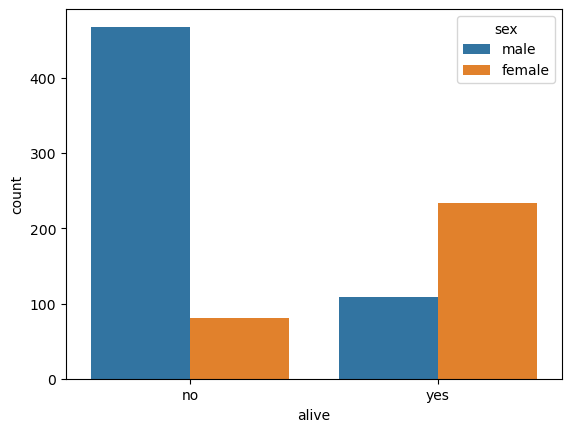

In [39]:
sns.countplot(x = data['alive'], hue = data['sex'])

## Multivariate

<Axes: >

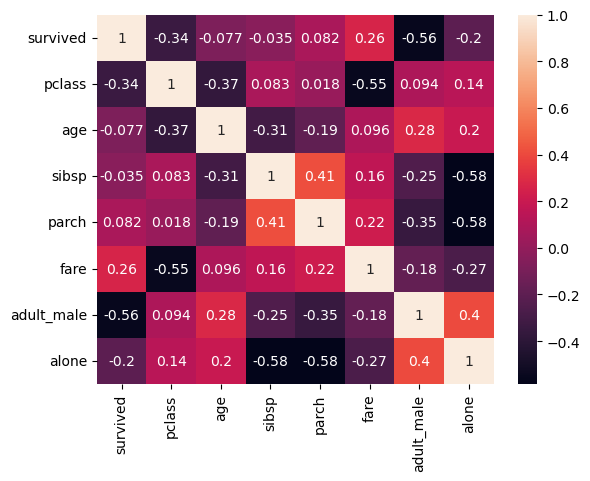

In [40]:
sns.heatmap(data.corr(numeric_only=True), annot = True)

## Descriptive statistics on the dataset.

In [42]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Handle the Missing values

In [43]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [44]:
data.dropna(subset=['embark_town'], how='all', inplace = True)

In [45]:
data['age'] = data['age'].fillna(data['age'].mean())

In [46]:
data.drop(['deck'], axis = 1,inplace = True)

In [48]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## Find the outliers and replace the outliers

<Axes: >

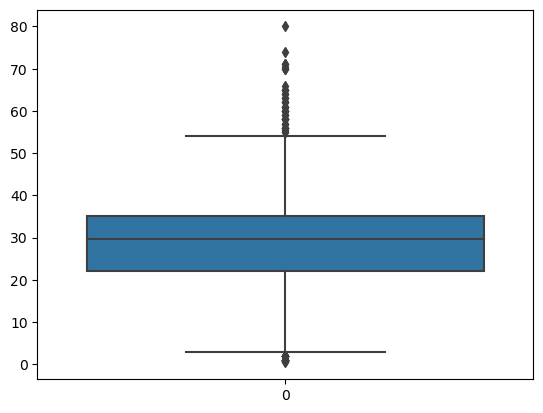

In [49]:
sns.boxplot(data['age'])

<Axes: >

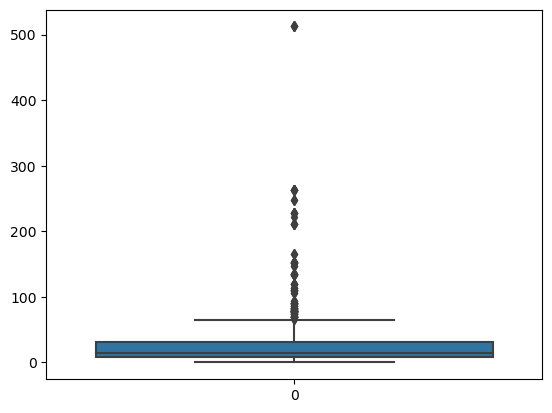

In [50]:
sns.boxplot(data['fare'])

<Axes: >

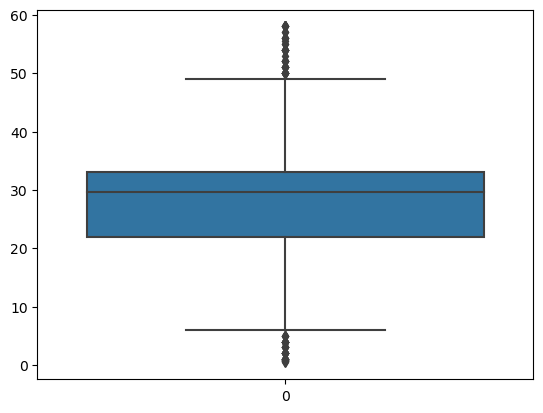

In [52]:
median_age = data['age'].median()
data["age"] = np.where(data["age"] > 58, median_age, data['age']) 
sns.boxplot(data['age'])

<Axes: >

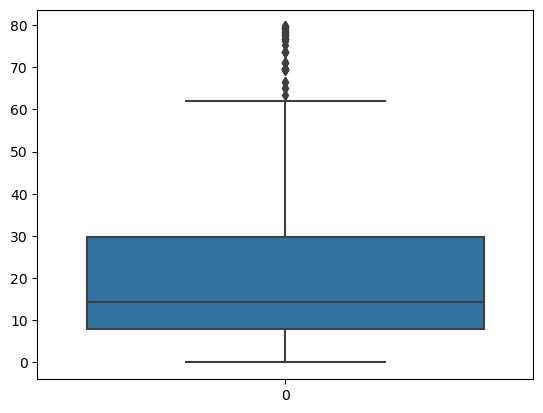

In [53]:
median_fare = data['fare'].median()
data["fare"] = np.where(data["fare"] > 80, median_age, data['fare'])
sns.boxplot(data['fare'])

## Check for Categorical columns and perform encoding

In [65]:
from sklearn.preprocessing import OneHotEncoder
encoding = pd.get_dummies(data, columns = ['pclass','sex','sibsp','embarked','embark_town','class','who','alone','adult_male'])
encoding.head()

,survived,age,parch,fare,alive,pclass_1,pclass_2,pclass_3,sex_female,sex_male,...,class_First,class_Second,class_Third,who_child,who_man,who_woman,alone_False,alone_True,adult_male_False,adult_male_True
0,0,22.0,0,7.2500,no,0,0,1,0,1,...,0,0,1,0,1,0,1,0,0,1
1,1,38.0,0,71.2833,yes,1,0,0,1,0,...,1,0,0,0,0,1,1,0,1,0
2,1,26.0,0,7.9250,yes,0,0,1,1,0,...,0,0,1,0,0,1,0,1,1,0
3,1,35.0,0,53.1000,yes,1,0,0,1,0,...,1,0,0,0,0,1,1,0,1,0
4,0,35.0,0,8.0500,no,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,1


## Split the data into dependent and independent variables

In [66]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [67]:
# independent variables
X = encoding.drop(['survived', 'alive'], axis = 1)
X.head()

,age,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,...,class_First,class_Second,class_Third,who_child,who_man,who_woman,alone_False,alone_True,adult_male_False,adult_male_True
0,22.0,0,7.2500,0,0,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,1
1,38.0,0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,1,1,0,1,0
2,26.0,0,7.9250,0,0,1,1,0,1,0,...,0,0,1,0,0,1,0,1,1,0
3,35.0,0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,1,1,0,1,0
4,35.0,0,8.0500,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1


In [68]:
# dependent variables
y = data[['survived', 'alive']] 
y.head()

,survived,alive
0,0,no
1,1,yes
2,1,yes
3,1,yes
4,0,no


## Scaling the independent variables

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_std = scaler.fit_transform(X)

In [70]:
x_std

array([[-0.57985934, -0.47432585, -0.80778717, ..., -1.22934919,
        -0.80962552,  0.80962552],
       [ 0.83108889, -0.47432585,  2.85918585, ..., -1.22934919,
         1.23513893, -1.23513893],
       [-0.22712228, -0.47432585, -0.76913217, ...,  0.81343853,
         1.23513893, -1.23513893],
       ...,
       [ 0.09405298,  2.00611934,  0.11993267, ..., -1.22934919,
         1.23513893, -1.23513893],
       [-0.22712228, -0.47432585,  0.49502928, ...,  0.81343853,
        -0.80962552,  0.80962552],
       [ 0.3019833 , -0.47432585, -0.77915384, ...,  0.81343853,
        -0.80962552,  0.80962552]])

## Split the data into training and testing

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y['survived'],test_size = 0.3)

In [73]:
X_train

,age,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,...,class_First,class_Second,class_Third,who_child,who_man,who_woman,alone_False,alone_True,adult_male_False,adult_male_True
655,24.000000,0,73.500000,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
141,22.000000,0,7.750000,0,0,1,1,0,1,0,...,0,0,1,0,0,1,0,1,1,0
363,35.000000,0,7.050000,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
582,54.000000,0,26.000000,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,1
357,38.000000,0,13.000000,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,30.000000,0,8.662500,0,0,1,1,0,1,0,...,0,0,1,0,0,1,0,1,1,0
97,23.000000,1,63.358300,1,0,0,0,1,1,0,...,1,0,0,0,1,0,1,0,0,1
613,29.642093,0,7.750000,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
700,18.000000,0,29.642093,1,0,0,1,0,0,1,...,1,0,0,0,0,1,1,0,1,0


In [74]:
X_test

,age,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,...,class_First,class_Second,class_Third,who_child,who_man,who_woman,alone_False,alone_True,adult_male_False,adult_male_True
885,39.000000,5,29.1250,0,0,1,1,0,1,0,...,0,0,1,0,0,1,1,0,1,0
718,29.642093,0,15.5000,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
137,37.000000,0,53.1000,1,0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,1
464,29.642093,0,8.0500,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
419,10.000000,2,24.1500,0,0,1,1,0,1,0,...,0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,6.000000,1,33.0000,0,1,0,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0
750,4.000000,1,23.0000,0,1,0,1,0,0,1,...,0,1,0,1,0,0,1,0,1,0
477,29.000000,0,7.0458,0,0,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,1
868,29.642093,0,9.5000,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1


In [75]:
y_train

655    0
141    1
363    0
582    0
357    0
      ..
534    0
97     1
613    0
700    1
347    1
Name: survived, Length: 622, dtype: int64

In [76]:
y_test

885    0
718    0
137    0
464    0
419    0
      ..
720    1
750    1
477    0
868    0
556    1
Name: survived, Length: 267, dtype: int64